In [325]:
input_size=2 #no_of_features
layers = [4,3] #no of neurons in layers
output_size = 2

In [326]:
import numpy as np

In [327]:
def softmax(ea):
    e_pa = np.exp(ea)
    ans = e_pa/np.sum(e_pa,axis=1,keepdims = True)
    return ans

In [328]:
a = np.array([[10,20],[10,20]])
softmax(a)

array([[4.53978687e-05, 9.99954602e-01],
       [4.53978687e-05, 9.99954602e-01]])

In [329]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        self.model =model
        
        
        
    def forward(self,x):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
        z1 = np.dot(x,W1) +b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,W2)+b2
        a2 = np.tanh(z2)
        z3 = np.dot(a2,W3)+b3
        y_ = softmax(z3)
        self.activation_outputs = (a1,a2,y_)
        return y_
    
    def backward(self,x,y,lr = 0.001):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
        a1,a2,y_ = self.activation_outputs
        delta_3 = y_-y
        m = x.shape[0]
        dw3 = np.dot(a2.T,delta_3)
        db3 = np.sum(delta_3,axis=0)/float(m)
        a1,a2,y_ = self.activation_outputs
        delta2  = (1-np.square(a2))*np.dot(delta_3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)/float(m)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)/float(m)
        self.model["W1"] -= lr*dw1
        self.model["b1"]-=db1
        
        self.model["W2"] -= lr*dw2
        self.model["b2"]-=db2
        
        self.model["W3"] -= lr*dw3
        self.model["b3"]-=db3
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        a1,a2,y_ = self.activation_outputs
        print("W1",W1.shape)
        print("A1",a1.shape)
        print("W2",W2.shape)
        print("A2",a2.shape)
        print("W3",W3.shape)
        print("Y_",y_.shape)
        
        
        
        

In [330]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

In [331]:
def one_oht(y,k):
    m = y.shape[0]
    y_oht = np.zeros((m,k))
    y_oht[np.arange(m),y]=1
    return y_oht

In [332]:
from sklearn.datasets import make_circles,make_blobs
import matplotlib.pyplot as plt


In [333]:
make_blobs?

In [334]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.9)

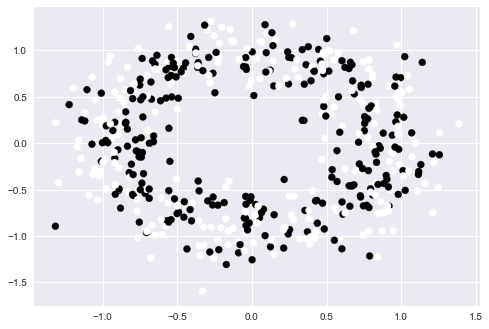

In [335]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [356]:
model = NeuralNetwork(input_size=2,layers = [10,5],output_size=2)


In [357]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    classes=2
    Y_OHT = one_oht(Y,classes)
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l),end='\n')
            
    return training_loss

In [358]:
losses = train(X,Y,model,250,0.000001)

Epoch 0 Loss 0.3427
Epoch 1 Loss 0.3734
Epoch 2 Loss 0.2863
Epoch 3 Loss 0.2798
Epoch 4 Loss 0.2762
Epoch 5 Loss 0.2729
Epoch 6 Loss 0.2699
Epoch 7 Loss 0.2677
Epoch 8 Loss 0.2661
Epoch 9 Loss 0.2651
Epoch 10 Loss 0.2643
Epoch 11 Loss 0.2636
Epoch 12 Loss 0.2630
Epoch 13 Loss 0.2624
Epoch 14 Loss 0.2619
Epoch 15 Loss 0.2614
Epoch 16 Loss 0.2609
Epoch 17 Loss 0.2604
Epoch 18 Loss 0.2598
Epoch 19 Loss 0.2592
Epoch 20 Loss 0.2586
Epoch 21 Loss 0.2580
Epoch 22 Loss 0.2572
Epoch 23 Loss 0.2564
Epoch 24 Loss 0.2555
Epoch 25 Loss 0.2545
Epoch 26 Loss 0.2532
Epoch 27 Loss 0.2518
Epoch 28 Loss 0.2501
Epoch 29 Loss 0.2480
Epoch 30 Loss 0.2456
Epoch 31 Loss 0.2427
Epoch 32 Loss 0.2394
Epoch 33 Loss 0.2357
Epoch 34 Loss 0.2317
Epoch 35 Loss 0.2275
Epoch 36 Loss 0.2234
Epoch 37 Loss 0.2191
Epoch 38 Loss 0.2148
Epoch 39 Loss 0.2102
Epoch 40 Loss 0.2052
Epoch 41 Loss 0.1995
Epoch 42 Loss 0.1929
Epoch 43 Loss 0.1854
Epoch 44 Loss 0.1774
Epoch 45 Loss 0.1695
Epoch 46 Loss 0.1620
Epoch 47 Loss 0.1553
Ep

Text(0, 0.5, 'losses')

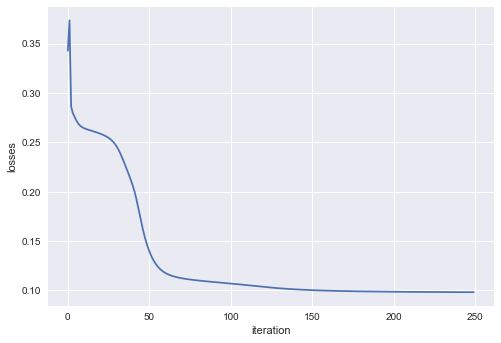

In [359]:
plt.plot(losses)
plt.xlabel("iteration")
plt.ylabel("losses")

In [340]:
from visualize import plot_decision_boundary

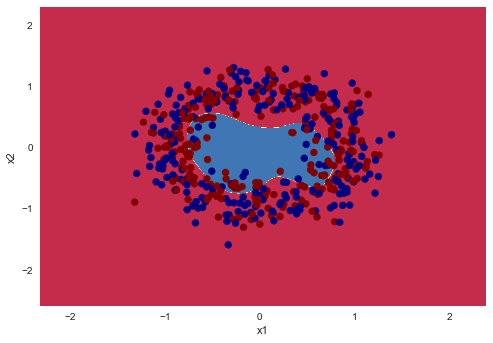

In [341]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [342]:
np.sum(model.predict(X)==Y)/X.shape[0]

0.544

In [343]:
X= np.array([[0,0],[1,0],[1,1],[0,1]])

In [344]:
X.shape

(4, 2)

In [345]:
Y = np.array([0,1,0,1])

In [346]:
train(X,Y,model,300,0.001)

Epoch 0 Loss 0.4074
Epoch 1 Loss 0.3161
Epoch 2 Loss 0.2838
Epoch 3 Loss 0.2739
Epoch 4 Loss 0.2684
Epoch 5 Loss 0.2649
Epoch 6 Loss 0.2625
Epoch 7 Loss 0.2606
Epoch 8 Loss 0.2589
Epoch 9 Loss 0.2574
Epoch 10 Loss 0.2559
Epoch 11 Loss 0.2545
Epoch 12 Loss 0.2531
Epoch 13 Loss 0.2517
Epoch 14 Loss 0.2503
Epoch 15 Loss 0.2489
Epoch 16 Loss 0.2475
Epoch 17 Loss 0.2462
Epoch 18 Loss 0.2448
Epoch 19 Loss 0.2434
Epoch 20 Loss 0.2420
Epoch 21 Loss 0.2406
Epoch 22 Loss 0.2392
Epoch 23 Loss 0.2378
Epoch 24 Loss 0.2363
Epoch 25 Loss 0.2349
Epoch 26 Loss 0.2334
Epoch 27 Loss 0.2319
Epoch 28 Loss 0.2303
Epoch 29 Loss 0.2288
Epoch 30 Loss 0.2271
Epoch 31 Loss 0.2254
Epoch 32 Loss 0.2237
Epoch 33 Loss 0.2219
Epoch 34 Loss 0.2200
Epoch 35 Loss 0.2181
Epoch 36 Loss 0.2160
Epoch 37 Loss 0.2140
Epoch 38 Loss 0.2119
Epoch 39 Loss 0.2099
Epoch 40 Loss 0.2078
Epoch 41 Loss 0.2058
Epoch 42 Loss 0.2039
Epoch 43 Loss 0.2021
Epoch 44 Loss 0.2003
Epoch 45 Loss 0.1987
Epoch 46 Loss 0.1971
Epoch 47 Loss 0.1956
Ep

[0.4073940208503732,
 0.3161488832722282,
 0.28377735360720535,
 0.27394228962625106,
 0.26843316686868124,
 0.26494359650261373,
 0.26250469137832594,
 0.2605756880428085,
 0.25890119806091294,
 0.25736010882463545,
 0.255892125996761,
 0.25446555734564347,
 0.25306280994528896,
 0.2516735735704341,
 0.25029148365107257,
 0.248912420379264,
 0.24753359780486525,
 0.2461530386820393,
 0.2447692360578621,
 0.24338090246500854,
 0.24198675867669303,
 0.24058534147601898,
 0.23917482517916522,
 0.2377528600103454,
 0.2363164345740495,
 0.23486177144957648,
 0.2333842660038542,
 0.23187848046620935,
 0.23033820942614036,
 0.22875663981707858,
 0.22712663754768272,
 0.2254412016896252,
 0.22369412994880833,
 0.22188092632872203,
 0.2199999397378668,
 0.21805363728932153,
 0.21604978694077395,
 0.21400218249098882,
 0.211930471310821,
 0.20985875578237217,
 0.20781299831054106,
 0.20581776737162377,
 0.20389323390343622,
 0.2020532798026457,
 0.2003051014984801,
 0.19865008956739727,
 0.1970

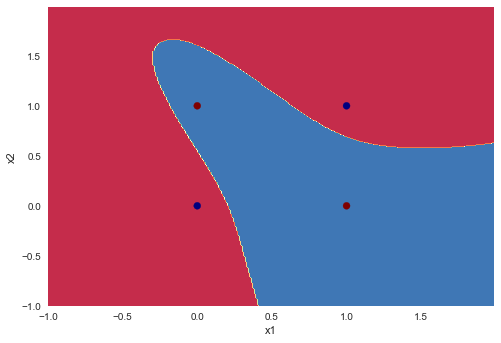

In [347]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)